In [256]:
pwd

'/Users/mengyiwang'

In [257]:
import numpy as np

In [258]:
import pandas as pd

In [259]:
import matplotlib.pyplot as plt
%matplotlib inline

In [260]:
Sales = pd.read_csv('Sales_data.csv')

In [261]:
Sales.rename(columns={'Invoice Date': 'InvoiceDate'},inplace=True)

In [262]:
Sales.head()

,InvoiceNo,StockCode,Quantity Shipped,Year,InvoiceDate,UnitPrice,Ext-Price,CustomerID,Country,GM%,Shipper,COST,EXT COST,REGION,SALES P
0,568200,PADS,5.00,2017,43003,0.999975,4.999876,16198,United Kingdom,0.000023,Delivery Truck,0.999953,4.999763,SOUTH,GRACE J
1,568375,BANK CHARGES,5.00,2017,43004,0.999976,4.999883,13405,United Kingdom,1.000000,UPS Next day Air,0.000000,0.000000,WEST,JEFF Y
2,561226,PADS,5.00,2017,42942,0.999886,4.999428,15618,United Kingdom,-0.000067,Delivery Truck,0.999953,4.999763,SOUTH,GRACE J
3,2550193,PADS,7.08,2018,43259,0.999962,7.079728,13952,United Kingdom,0.000009,UPS ground 2nd day,0.999953,7.079664,CENTRAL,PETER T
4,550193,PADS,5.00,2017,42840,0.999988,4.999940,13952,United Kingdom,0.000035,UPS ground 2nd day,0.999953,4.999763,CENTRAL,PETER T


In [263]:
customer_country=Sales[['Country','CustomerID']].drop_duplicates()
customer_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
36,United Kingdom,3753
14,Germany,91
13,France,88
10,EIRE,31
31,Spain,30
3,Belgium,24
33,Switzerland,22
27,Portugal,18
19,Italy,13
12,Finland,11


In [264]:
Sales.Country.nunique()

38

More than most of the customers in the data are from the United Kingdom. There’s some research indicating that customer clusters vary by geography, so here I’ll restrict the data to the United Kingdom only.

In [265]:
Sales1 = Sales.loc[Sales['Country'] == 'United Kingdom']

In [266]:
Sales1.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Quantity Shipped    0
Year                0
InvoiceDate         0
UnitPrice           0
Ext-Price           0
CustomerID          0
Country             0
GM%                 0
Shipper             0
COST                0
EXT COST            0
REGION              0
SALES P             0
dtype: int64

There are no missing values.

In [267]:
Sales1= Sales1[(Sales1['Quantity Shipped']>0)]

In [268]:
Sales1.shape

(518643, 15)

In [269]:
Sales1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 518643 entries, 0 to 566308
Data columns (total 15 columns):
InvoiceNo           518643 non-null object
StockCode           518643 non-null object
Quantity Shipped    518643 non-null float64
Year                518643 non-null int64
InvoiceDate         518643 non-null object
UnitPrice           518643 non-null float64
Ext-Price           518643 non-null float64
CustomerID          518643 non-null int64
Country             518643 non-null object
GM%                 518643 non-null float64
Shipper             518643 non-null object
COST                518643 non-null float64
EXT COST            518643 non-null float64
REGION              518643 non-null object
SALES P             518643 non-null object
dtypes: float64(6), int64(2), object(7)
memory usage: 63.3+ MB


In [270]:
#Check unique value for each column

In [271]:
def unique_counts(Sales1):
   for i in Sales1.columns:
       count = Sales1[i].nunique()
       print(i, ": ", count)
unique_counts(Sales1)

InvoiceNo :  22743
StockCode :  3894
Quantity Shipped :  4743
Year :  3
InvoiceDate :  657
UnitPrice :  101552
Ext-Price :  431264
CustomerID :  3753
Country :  1
GM% :  463817
Shipper :  4
COST :  3679
EXT COST :  182539
REGION :  4
SALES P :  6


In [272]:
# check the first and last order date 

In [273]:
from datetime import datetime

In [274]:
Sales2=Sales1.ix[Sales1['InvoiceDate'] != '2/29/2018']

/Users/mengyiwang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [275]:
Sales2.head(20)
Sales2.to_csv('Sales2')

In [276]:
Sales2['InvoiceDate'].max()

'43461'

In [22]:
Sales2['InvoiceDate'].min()

'42705'

In [23]:
import datetime as dt
NOW = 43462
Sales2['InvoiceDate']=pd.to_numeric(Sales2.InvoiceDate, errors='coerce')

/Users/mengyiwang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# RFM Customer Segmentation

In [24]:
#Create a RFM table 

In [25]:
# len(x) return the occuring number of x
rfm = Sales2.groupby('CustomerID').agg({'InvoiceDate': lambda x: (NOW - x.max()), 'InvoiceNo': lambda x: len(x), 'GM%': lambda x: x.sum()})
rfm.rename(columns={'InvoiceDate': 'recency','InvoiceNo': 'frequency','GM%': 'monetary'}, inplace=True)

In [26]:
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346,233,2,-0.314336
12431,9,1008,114.305114
12433,8,1153,118.542543
12471,13,2880,270.742080
12583,15,893,101.241940


CustomerID 12346 has recency: 233 days, frequency: 2, monetary value: 750867.968067
CustomerID 12431 has recency: 9 days, frequency: 1008, monetary value: 55287.06745

# Split the metrics into segments by Quantiles



In [27]:
quantiles = rfm.quantile(q=[0.20,0.40,0.60,0.80])
quantiles = quantiles.to_dict()

In [28]:
segmented_rfm = rfm

In [29]:

# for frequency,the higher, the better,5 is the best, 1 is the worst    
# for monetary,the higher, the better,5 is the best, 1 is the worst    
def Score(x,p,d):
    if x <= d[p][0.20]:
        return 1
    elif x <= d[p][0.40]:
        return 2
    elif x <= d[p][0.60]: 
        return 3
    elif x <= d[p][0.80]: 
        return 4
    else:
        return 5

In [30]:
#for recency score,the higher, the better,5 is the best，1 is the worst
def Score1 (x,p,d):
    if x <= d[p][0.20]:
        return 5
    elif x <= d[p][0.40]:
        return 4
    elif x <= d[p][0.60]: 
        return 3
    elif x <= d[p][0.80]: 
        return 2
    else:
        return 1

In [31]:
segmented_rfm['r_quantile'] = segmented_rfm['recency'].apply(Score1, args=('recency',quantiles,))
segmented_rfm['f_quantile'] = segmented_rfm['frequency'].apply(Score, args=('frequency',quantiles,))
segmented_rfm['m_quantile'] = segmented_rfm['monetary'].apply(Score, args=('monetary',quantiles,))
segmented_rfm.head()

,recency,frequency,monetary,r_quantile,f_quantile,m_quantile
CustomerID,,,,,,
12346,233,2,-0.314336,2,1,1
12431,9,1008,114.305114,5,5,5
12433,8,1153,118.542543,5,5,5
12471,13,2880,270.742080,5,5,5
12583,15,893,101.241940,5,5,5


In [228]:
segmented_rfm['RFMScore'] = segmented_rfm.r_quantile.map(str) + segmented_rfm.f_quantile.map(str) + segmented_rfm.m_quantile.map(str)
segmented_rfm.head()
segmented_rfm.to_csv('segmented_rfm')

111 is the highest score.

In [229]:
#top 10 of our best customers 

In [34]:
segmented_rfm[segmented_rfm['RFMScore']=='555'].sort_values('monetary', ascending=False).head(10)

,recency,frequency,monetary,r_quantile,f_quantile,m_quantile,RFMScore
CustomerID,,,,,,,
17841,3,8852,597.201561,5,5,5,555
14606,3,4174,391.669963,5,5,5,555
17377,12,4093,379.214394,5,5,5,555
13767,8,2976,321.084342,5,5,5,555
14237,8,3633,317.872764,5,5,5,555
12748,5,5010,315.576670,5,5,5,555
14849,9,3192,310.257833,5,5,5,555
15640,3,3219,298.931555,5,5,5,555
12838,7,3160,278.786163,5,5,5,555


# Kmean

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(segmented_rfm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow graph')
plt.xlabel('Cluster number')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
clusters = kmeans.fit_predict(segmented_rfm)

In [232]:
segmented_rfm['clusters'] = clusters
segmented_rfm.head(10)

NameError: name 'clusters' is not defined

In [ ]:
#Champions	4-5  	4-5
Loyal Customers	2-5	 3-5
Potential Loyalist	3-5	 1-3
Recent Customers	4-5 	0-1
Promising	3-4	 0-1
Customers Needing Attention	2-3 	2-3
About To Sleep	2-3	 0-2
At Risk	0-2	 2-5
Can’t Lose Them	0-1 	4-5
Hibernating	1-2	 1-2
Lost	0-2	 0-2

In [ ]:
#AT RISK --0-CLUSTER 1-BLUE
segmented_rfm[segmented_rfm['clusters']==0][['recency', 'frequency', 'monetary']].mean()

In [231]:
#Loyal customer--1-CLUSTER 2-YELLOW
segmented_rfm[segmented_rfm['clusters']==1][['recency', 'frequency', 'monetary']].mean()

KeyError: 'clusters'

In [ ]:
#SHOPPER---2---CLUSTER 3--GREEN
segmented_rfm[segmented_rfm['clusters']==2][['recency', 'frequency', 'monetary']].mean()

In [ ]:
#champion---3---CLUSTER 4---RED
segmented_rfm[segmented_rfm['clusters']==3][['recency', 'frequency', 'monetary']].mean()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(segmented_rfm.recency, segmented_rfm.frequency, segmented_rfm.monetary, s=50)

ax.set_xlabel('recency')
ax.set_ylabel('frequency')
ax.set_zlabel('monetary')

In [ ]:
fig = plt.figure(figsize=(15,10))
dx = fig.add_subplot(111, projection='3d')
colors = ['blue', 'yellow', 'green', 'red']

for i in range(0,4):
    dx.scatter(segmented_rfm[segmented_rfm.clusters == i].recency, 
               segmented_rfm[segmented_rfm.clusters == i].frequency, 
               segmented_rfm[segmented_rfm.clusters == i].monetary, 
               c = colors[i], 
               label = 'Cluster ' + str(i+1), 
               s=50)

dx.set_title('Clusters of clients')
dx.set_xlabel('recency')
dx.set_ylabel('frequency')
dx.set_zlabel('monetary')
dx.legend()

In [ ]:
segmented_rfm.head(20)

In [ ]:
cluster_demo=pd.concat([segmented_rfm,Sales2], axis=1, join='inner')
cluster_demo.to_csv('cluster_demo.csv')
cluster_demo.head(20)

In [ ]:
def scoreF(row):
    x = row['clusters']

    if x == 0:
        return 'At Risk'
    elif x == 1 :
        return 'Loyal'
    elif x == 2 :
        return 'Shopper'
    elif x == 3:
        return 'Champion'

print ("final result")
cluster_demo['Segment'] = cluster_demo.apply(lambda row: scoreF(row), axis=1)
cluster_demo.head(20)

cluster_demo.to_csv('cluster_demo.csv')

In [35]:
#Champions R：4-5，F：4-5，M：4-5 
Champions=segmented_rfm[(segmented_rfm.r_quantile>=4)&(segmented_rfm.r_quantile<=5)&(segmented_rfm.f_quantile>=4)&(segmented_rfm.f_quantile<=5)&(segmented_rfm.m_quantile>=4)&(segmented_rfm.m_quantile<=5)]
Champions['Segments']='Champions'
Champions.loc[:,'Segments'] = 'Champions'
Champions=pd.concat([Champions,Sales2], axis=1, join='inner')
Champions.head(20)

/Users/mengyiwang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mengyiwang/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,recency,frequency,monetary,r_quantile,f_quantile,m_quantile,RFMScore,Segments,InvoiceNo,StockCode,...,UnitPrice,Ext-Price,CustomerID,Country,GM%,Shipper,COST,EXT COST,REGION,SALES P
12431,9,1008,114.305114,5,5,5,555,Champions,562680,22716,...,1.024108,14.862367,17954,United Kingdom,-0.080587,Delivery Truck,1.106638,16.060080,NORTH,JOHN A
12433,8,1153,118.542543,5,5,5,555,Champions,581217,20668,...,1.024696,26.437157,17017,United Kingdom,0.005150,UPS ground 2nd day,1.019419,26.301002,NORTH,JOHN A
12471,13,2880,270.742080,5,5,5,555,Champions,577696,35095B,...,1.031500,6.189000,16406,United Kingdom,-0.013384,Delivery Truck,1.045305,6.271831,WEST,JEFF Y
12583,15,893,101.241940,5,5,5,555,Champions,574700,16235,...,1.062181,1.141845,16033,United Kingdom,0.024325,Delivery Truck,1.036343,1.114069,NORTH,JOHN A
12682,10,778,36.094488,5,5,5,555,Champions,558328,22983,...,1.104412,17.891474,15146,United Kingdom,-0.001614,UPS ground 3rd day,1.106195,17.920357,CENTRAL,GAIL H
12747,14,98,18.311291,5,4,5,545,Champions,2549431,22983,...,1.193998,1340.453795,15874,United Kingdom,0.073537,UPS Next day Air,1.106195,1241.880756,CENTRAL,GAIL H
12748,5,5010,315.576670,5,5,5,555,Champions,537254,22984,...,1.196812,375.164658,15898,United Kingdom,0.089276,UPS ground 3rd day,1.089965,341.671400,NORTH,JOHN A
12749,51,226,24.364091,4,5,5,455,Champions,2550305,22710,...,1.196980,223.966928,17920,United Kingdom,0.091857,UPS Next day Air,1.087029,203.393933,NORTH,JOHN A
12826,20,125,10.013965,5,4,4,544,Champions,2551471,16011,...,1.013650,13.501818,16370,United Kingdom,-0.012865,UPS Next day Air,1.026690,13.675514,CENTRAL,PETER T
12836,57,259,23.774845,4,5,5,455,Champions,2546317,16219,...,1.049728,49.291028,14913,United Kingdom,-0.011590,UPS ground 2nd day,1.061895,49.862321,NORTH,STEPHAN B


#Big Spenders M：4 
#XX4Customers who have spent the most.Market your most expensive products.
BigSpenders=segmented_rfm[segmented_rfm.m_quantile==4]
BigSpenders.head(20)

In [36]:
#Loyal Customers R:2-5 F:3-5 M :3-5
#X4X Customers who have purchased most frequently and purchased recently.
#Upsell higher value products. Ask for reviews. Engage them.
Loyal=segmented_rfm[(segmented_rfm.r_quantile>=2)&(segmented_rfm.r_quantile<=5)&(segmented_rfm.f_quantile>=3)&(segmented_rfm.f_quantile<=5)&(segmented_rfm.m_quantile>=3)&(segmented_rfm.m_quantile<=5)]
Loyal['Segments']='Loyal Customers'
Loyal.loc[:,'Segments'] = 'Loyal Customers'
Loyal=pd.concat([Loyal,Sales2], axis=1, join='inner')
Loyal.head(10)

/Users/mengyiwang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/mengyiwang/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,recency,frequency,monetary,r_quantile,f_quantile,m_quantile,RFMScore,Segments,InvoiceNo,StockCode,...,UnitPrice,Ext-Price,CustomerID,Country,GM%,Shipper,COST,EXT COST,REGION,SALES P
12431,9,1008,114.305114,5,5,5,555,Loyal Customers,562680,22716,...,1.024108,14.862367,17954,United Kingdom,-0.080587,Delivery Truck,1.106638,16.060080,NORTH,JOHN A
12433,8,1153,118.542543,5,5,5,555,Loyal Customers,581217,20668,...,1.024696,26.437157,17017,United Kingdom,0.005150,UPS ground 2nd day,1.019419,26.301002,NORTH,JOHN A
12471,13,2880,270.742080,5,5,5,555,Loyal Customers,577696,35095B,...,1.031500,6.189000,16406,United Kingdom,-0.013384,Delivery Truck,1.045305,6.271831,WEST,JEFF Y
12583,15,893,101.241940,5,5,5,555,Loyal Customers,574700,16235,...,1.062181,1.141845,16033,United Kingdom,0.024325,Delivery Truck,1.036343,1.114069,NORTH,JOHN A
12682,10,778,36.094488,5,5,5,555,Loyal Customers,558328,22983,...,1.104412,17.891474,15146,United Kingdom,-0.001614,UPS ground 3rd day,1.106195,17.920357,CENTRAL,GAIL H
12747,14,98,18.311291,5,4,5,545,Loyal Customers,2549431,22983,...,1.193998,1340.453795,15874,United Kingdom,0.073537,UPS Next day Air,1.106195,1241.880756,CENTRAL,GAIL H
12748,5,5010,315.576670,5,5,5,555,Loyal Customers,537254,22984,...,1.196812,375.164658,15898,United Kingdom,0.089276,UPS ground 3rd day,1.089965,341.671400,NORTH,JOHN A
12749,51,226,24.364091,4,5,5,455,Loyal Customers,2550305,22710,...,1.196980,223.966928,17920,United Kingdom,0.091857,UPS Next day Air,1.087029,203.393933,NORTH,JOHN A
12820,175,66,2.905426,3,3,3,333,Loyal Customers,2553488,16237,...,1.005166,133.313282,18043,United Kingdom,-0.029474,UPS ground 3rd day,1.034792,137.242526,NORTH,JOHN A
12826,20,125,10.013965,5,4,4,544,Loyal Customers,2551471,16011,...,1.013650,13.501818,16370,United Kingdom,-0.012865,UPS Next day Air,1.026690,13.675514,CENTRAL,PETER T


In [37]:
#Potential Loyalist R:3-5 F M 1-3
PotentialLoyal=segmented_rfm[(segmented_rfm.r_quantile>=3)&(segmented_rfm.r_quantile<=5)&(segmented_rfm.f_quantile>=1)&(segmented_rfm.f_quantile<=3)&(segmented_rfm.m_quantile>=1)&(segmented_rfm.m_quantile<=3)]
PotentialLoyal['Segments']='Potential Loyalist'
PotentialLoyal.loc[:,'Segments'] = 'Potential Loyalist'
PotentialLoyal=pd.concat([PotentialLoyal,Sales2], axis=1, join='inner')
PotentialLoyal.head(10)

/Users/mengyiwang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mengyiwang/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,recency,frequency,monetary,r_quantile,f_quantile,m_quantile,RFMScore,Segments,InvoiceNo,StockCode,...,UnitPrice,Ext-Price,CustomerID,Country,GM%,Shipper,COST,EXT COST,REGION,SALES P
12820,175,66,2.905426,3,3,3,333,Potential Loyalist,2553488,16237,...,1.005166,133.313282,18043,United Kingdom,-0.029474,UPS ground 3rd day,1.034792,137.242526,NORTH,JOHN A
12821,56,6,0.861452,4,1,2,412,Potential Loyalist,2551869,16012,...,1.007056,18.025044,16767,United Kingdom,-0.020297,UPS Next day Air,1.027497,18.390904,WEST,JEFF Y
12823,171,4,0.779689,3,1,2,312,Potential Loyalist,2538708,84821,...,1.009996,0.201999,16202,United Kingdom,-0.030557,UPS ground 3rd day,1.040859,0.208172,NORTH,STEPHAN B
12829,15,16,-2.351310,5,2,1,521,Potential Loyalist,546317,16219,...,1.022344,248.429592,14913,United Kingdom,-0.038686,UPS ground 2nd day,1.061895,258.040380,NORTH,STEPHAN B
12830,12,35,0.079623,5,3,1,531,Potential Loyalist,552234,84598,...,1.024570,24.589680,15834,United Kingdom,1.000000,UPS ground 3rd day,0.000000,0.000000,SOUTH,GRACE J
12831,105,17,1.415992,3,2,2,322,Potential Loyalist,539255,22609,...,1.027090,1895.997869,16316,United Kingdom,-0.045389,UPS Next day Air,1.073708,1982.054380,NORTH,STEPHAN B
12842,150,45,4.426232,3,3,3,333,Potential Loyalist,558647,23119,...,1.062310,9.250064,14868,United Kingdom,-0.075580,UPS ground 2nd day,1.142599,9.949182,CENTRAL,PETER T
12845,123,31,0.523223,3,2,1,321,Potential Loyalist,2548910,21982,...,0.966500,17.351091,17940,United Kingdom,0.019120,Delivery Truck,0.948021,17.019347,CENTRAL,GAIL H
12871,51,15,1.559581,4,1,2,412,Potential Loyalist,561969,84926E,...,0.989212,8.613563,17757,United Kingdom,0.018585,UPS Next day Air,0.970828,8.453483,NORTH,JOHN A
12875,17,1,-0.023412,5,1,1,511,Potential Loyalist,2540604,85230F,...,0.993330,804.597300,15326,United Kingdom,0.022743,UPS ground 3rd day,0.970739,786.298337,WEST,JEFF Y


In [38]:
#New Customers R:4-5 F:0-1,M: 0-1
RecentCustomers=segmented_rfm[(segmented_rfm.r_quantile>=4)&(segmented_rfm.r_quantile<=5)&(segmented_rfm.f_quantile>=0)&(segmented_rfm.f_quantile<=1)&(segmented_rfm.m_quantile>=0)&(segmented_rfm.m_quantile<=1)]
RecentCustomers['Segments']='New Customers'
RecentCustomers.loc[:,'Segments'] = 'New Customers'
RecentCustomers=pd.concat([RecentCustomers,Sales2], axis=1, join='inner')
RecentCustomers.head(10)


/Users/mengyiwang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mengyiwang/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,recency,frequency,monetary,r_quantile,f_quantile,m_quantile,RFMScore,Segments,InvoiceNo,StockCode,...,UnitPrice,Ext-Price,CustomerID,Country,GM%,Shipper,COST,EXT COST,REGION,SALES P
12875,17,1,-0.023412,5,1,1,511,New Customers,2540604,85230F,...,0.993330,804.597300,15326,United Kingdom,0.022743,UPS ground 3rd day,0.970739,786.298337,WEST,JEFF Y
13080,19,12,-0.326378,5,1,1,511,New Customers,571039,22044,...,0.986700,1.973400,16121,United Kingdom,0.017308,UPS Next day Air,0.969622,1.939244,CENTRAL,PETER T
13420,24,14,0.623444,4,1,1,411,New Customers,568168,21519,...,1.034020,2.223143,15799,United Kingdom,-0.021254,UPS ground 3rd day,1.055997,2.270393,WEST,JEFF Y
13631,46,14,-0.447034,4,1,1,411,New Customers,579605,22536,...,1.132300,5.661500,15024,United Kingdom,0.032151,UPS Next day Air,1.095895,5.479475,NORTH,JOHN A
13723,63,10,-1.767731,4,1,1,411,New Customers,2547903,84991,...,1.010780,1.688003,15039,United Kingdom,-0.036824,UPS ground 2nd day,1.048001,1.750161,NORTH,JOHN A
13922,6,13,0.190032,5,1,1,511,New Customers,568344,84077,...,1.020184,12.242208,16531,United Kingdom,-0.001955,UPS ground 3rd day,1.022178,12.266137,NORTH,STEPHAN B
14351,69,2,0.059345,4,1,1,411,New Customers,2547063,22820,...,1.171600,28.311714,14769,United Kingdom,0.030638,UPS ground 2nd day,1.135705,27.444303,NORTH,STEPHAN B
14353,67,11,-0.218747,4,1,1,411,New Customers,2541260,22917,...,1.175500,134.007000,16059,United Kingdom,0.009622,Delivery Truck,1.164190,132.717651,NORTH,JOHN A
14393,58,10,-0.333588,4,1,1,411,New Customers,2539256,22026,...,0.894160,0.178832,15601,United Kingdom,-0.043104,Delivery Truck,0.932702,0.186540,NORTH,JOHN A
14437,20,10,-0.038711,5,1,1,511,New Customers,563016,21918,...,0.949726,3.798904,15358,United Kingdom,0.009227,Delivery Truck,0.940963,3.763850,NORTH,JOHN A


In [39]:
#Promising R:3-4 F,M: 0-1
Promising=segmented_rfm[(segmented_rfm.r_quantile>=3)&(segmented_rfm.r_quantile<=4)&(segmented_rfm.f_quantile>=0)&(segmented_rfm.f_quantile<=1)&(segmented_rfm.m_quantile>=0)&(segmented_rfm.m_quantile<=1)]
Promising['Segments']='Promising'
Promising.loc[:,'Segments'] ='Promising'
Promising=pd.concat([Promising,Sales2], axis=1, join='inner')
Promising.head(10)

/Users/mengyiwang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mengyiwang/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,recency,frequency,monetary,r_quantile,f_quantile,m_quantile,RFMScore,Segments,InvoiceNo,StockCode,...,UnitPrice,Ext-Price,CustomerID,Country,GM%,Shipper,COST,EXT COST,REGION,SALES P
12881,135,14,-0.064186,3,1,1,311,Promising,562133,79051A,...,1.001276,2.002552,16419,United Kingdom,-0.032145,UPS ground 2nd day,1.033462,2.066924,CENTRAL,GAIL H
12908,168,5,-0.078377,3,1,1,311,Promising,574691,22597,...,1.089175,32.675250,14174,United Kingdom,-0.054040,UPS Next day Air,1.148034,34.441018,WEST,JEFF Y
13059,112,14,0.462630,3,1,1,311,Promising,563706,21159,...,1.076323,2.314094,14189,United Kingdom,-0.037977,Delivery Truck,1.117199,2.401977,NORTH,JOHN A
13161,167,12,0.315854,3,1,1,311,Promising,559691,21916,...,0.925744,8.331696,13089,United Kingdom,-0.004401,UPS Next day Air,0.929818,8.368364,NORTH,JOHN A
13223,178,5,0.506133,3,1,1,311,Promising,552039,22151,...,0.963838,3.855352,13081,United Kingdom,0.031818,UPS Next day Air,0.933170,3.732681,NORTH,JOHN A
13391,172,2,-0.744440,3,1,1,311,Promising,574009,21507,...,1.024024,165.891888,15750,United Kingdom,-0.034986,UPS Next day Air,1.059850,171.695769,NORTH,JOHN A
13420,24,14,0.623444,4,1,1,411,Promising,568168,21519,...,1.034020,2.223143,15799,United Kingdom,-0.021254,UPS ground 3rd day,1.055997,2.270393,WEST,JEFF Y
13512,103,14,-0.259751,3,1,1,311,Promising,554937,21495,...,1.062118,2.283554,15402,United Kingdom,0.014545,UPS ground 2nd day,1.046670,2.250340,SOUTH,GRACE J
13525,154,7,0.125721,3,1,1,311,Promising,557213,22533,...,1.067914,5.339570,15021,United Kingdom,-0.031002,UPS ground 2nd day,1.101021,5.505107,NORTH,JOHN A
13631,46,14,-0.447034,4,1,1,411,Promising,579605,22536,...,1.132300,5.661500,15024,United Kingdom,0.032151,UPS Next day Air,1.095895,5.479475,NORTH,JOHN A


In [40]:
#Needing Attention R:2-3 F,M: 2-3
NeedAttention=segmented_rfm[(segmented_rfm.r_quantile>=2)&(segmented_rfm.r_quantile<=3)&(segmented_rfm.f_quantile>=2)&(segmented_rfm.f_quantile<=3)&(segmented_rfm.m_quantile>=2)&(segmented_rfm.m_quantile<=3)]
NeedAttention['Segments']='Need Attention'
NeedAttention.loc[:,'Segments'] = 'Need Attention'
NeedAttention=pd.concat([NeedAttention,Sales2], axis=1, join='inner')
NeedAttention.head(10)

/Users/mengyiwang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mengyiwang/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,recency,frequency,monetary,r_quantile,f_quantile,m_quantile,RFMScore,Segments,InvoiceNo,StockCode,...,UnitPrice,Ext-Price,CustomerID,Country,GM%,Shipper,COST,EXT COST,REGION,SALES P
12820,175,66,2.905426,3,3,3,333,Need Attention,2553488,16237,...,1.005166,133.313282,18043,United Kingdom,-0.029474,UPS ground 3rd day,1.034792,137.242526,NORTH,JOHN A
12831,105,17,1.415992,3,2,2,322,Need Attention,539255,22609,...,1.027090,1895.997869,16316,United Kingdom,-0.045389,UPS Next day Air,1.073708,1982.054380,NORTH,STEPHAN B
12832,416,26,4.194215,2,2,3,223,Need Attention,2540672,16011,...,1.030429,64.242817,15281,United Kingdom,0.003628,Delivery Truck,1.026690,64.009720,WEST,JEFF Y
12842,150,45,4.426232,3,3,3,333,Need Attention,558647,23119,...,1.062310,9.250064,14868,United Kingdom,-0.075580,UPS ground 2nd day,1.142599,9.949182,CENTRAL,PETER T
12893,414,33,3.264233,2,2,3,223,Need Attention,580322,22578,...,1.033930,36.011782,17567,United Kingdom,-0.061880,Delivery Truck,1.097910,38.240191,NORTH,JOHN A
12895,426,19,2.598381,2,2,3,223,Need Attention,571219,22598,...,1.034800,167.637600,15601,United Kingdom,-0.126767,UPS Next day Air,1.165979,188.888596,NORTH,JOHN A
12902,109,19,3.079215,3,2,3,323,Need Attention,575975,22578,...,1.057768,171.358416,13536,United Kingdom,-0.037949,UPS Next day Air,1.097910,177.861352,SOUTH,GRACE J
12906,395,62,0.785028,2,3,2,232,Need Attention,571028,22579,...,1.068266,21.365320,16770,United Kingdom,-0.038456,UPS ground 3rd day,1.109347,22.186947,NORTH,JOHN A
12924,158,24,3.080176,3,2,3,323,Need Attention,537638,21802,...,0.984004,0.984004,12838,United Kingdom,0.032570,UPS ground 3rd day,0.951955,0.951955,NORTH,JOHN A
12936,401,62,4.036844,2,3,3,233,Need Attention,580025,22093,...,0.897898,21.549552,15021,United Kingdom,-0.038943,UPS Next day Air,0.932865,22.388758,NORTH,JOHN A


In [41]:
#About to sleep R:2-3 F,M: 0-2
AboutToSleep=segmented_rfm[(segmented_rfm.r_quantile>=2)&(segmented_rfm.r_quantile<=3)&(segmented_rfm.f_quantile>=0)&(segmented_rfm.f_quantile<=2)&(segmented_rfm.m_quantile>=0)&(segmented_rfm.m_quantile<=2)]
AboutToSleep['Segments']='About to Sleep'
AboutToSleep.loc[:,'Segments'] = 'About to Sleep'
AboutToSleep=pd.concat([AboutToSleep,Sales2], axis=1, join='inner')
AboutToSleep.head(10)

/Users/mengyiwang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mengyiwang/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,recency,frequency,monetary,r_quantile,f_quantile,m_quantile,RFMScore,Segments,InvoiceNo,StockCode,...,UnitPrice,Ext-Price,CustomerID,Country,GM%,Shipper,COST,EXT COST,REGION,SALES P
12346,233,2,-0.314336,2,1,1,211,About to Sleep,559139,21499,...,1.003906,4.316796,15061,United Kingdom,-0.039690,UPS Next day Air,1.043751,4.488129,SOUTH,GRACE J
12823,171,4,0.779689,3,1,2,312,About to Sleep,2538708,84821,...,1.009996,0.201999,16202,United Kingdom,-0.030557,UPS ground 3rd day,1.040859,0.208172,NORTH,STEPHAN B
12827,416,19,0.653463,2,2,1,221,About to Sleep,542058,17096,...,1.017325,29.527858,15601,United Kingdom,-0.016877,UPS ground 3rd day,1.034495,30.026204,NORTH,JOHN A
12831,105,17,1.415992,3,2,2,322,About to Sleep,539255,22609,...,1.027090,1895.997869,16316,United Kingdom,-0.045389,UPS Next day Air,1.073708,1982.054380,NORTH,STEPHAN B
12845,123,31,0.523223,3,2,1,321,About to Sleep,2548910,21982,...,0.966500,17.351091,17940,United Kingdom,0.019120,Delivery Truck,0.948021,17.019347,CENTRAL,GAIL H
12881,135,14,-0.064186,3,1,1,311,About to Sleep,562133,79051A,...,1.001276,2.002552,16419,United Kingdom,-0.032145,UPS ground 2nd day,1.033462,2.066924,CENTRAL,GAIL H
12891,227,2,0.007638,2,1,1,211,About to Sleep,568894,22577,...,1.031349,25.783725,17528,United Kingdom,-0.069098,UPS ground 3rd day,1.102613,27.565335,SOUTH,GRACE J
12908,168,5,-0.078377,3,1,1,311,About to Sleep,574691,22597,...,1.089175,32.675250,14174,United Kingdom,-0.054040,UPS Next day Air,1.148034,34.441018,WEST,JEFF Y
12912,386,24,-0.302997,2,2,1,221,About to Sleep,572746,23187,...,1.118668,64.938677,13263,United Kingdom,0.043145,Delivery Truck,1.070403,62.136907,WEST,JEFF Y
12938,409,9,0.668095,2,1,2,212,About to Sleep,573886,21982,...,0.905620,7.244960,14401,United Kingdom,-0.046820,Delivery Truck,0.948021,7.584168,NORTH,STEPHAN B


In [42]:
#At Risk R:0-2 F,M: 2-5
AtRisk=segmented_rfm[(segmented_rfm.r_quantile>=0)&(segmented_rfm.r_quantile<=2)&(segmented_rfm.f_quantile>=2)&(segmented_rfm.f_quantile<=5)&(segmented_rfm.m_quantile>=2)&(segmented_rfm.m_quantile<=5)]
AtRisk['Segments']='At Risk'
AtRisk.loc[:,'Segments'] = 'At Risk'
AtRisk=pd.concat([AtRisk,Sales2], axis=1, join='inner')
AtRisk.head(10)

/Users/mengyiwang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mengyiwang/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,recency,frequency,monetary,r_quantile,f_quantile,m_quantile,RFMScore,Segments,InvoiceNo,StockCode,...,UnitPrice,Ext-Price,CustomerID,Country,GM%,Shipper,COST,EXT COST,REGION,SALES P
12824,443,25,1.194899,1,2,2,122,At Risk,551869,16012,...,1.012348,225.500517,16767,United Kingdom,-0.014964,UPS Next day Air,1.027497,228.874854,WEST,JEFF Y
12828,386,40,5.468991,2,3,4,234,At Risk,538708,84821,...,1.021924,2.043848,16202,United Kingdom,-0.018528,UPS ground 3rd day,1.040859,2.081717,NORTH,STEPHAN B
12832,416,26,4.194215,2,2,3,223,At Risk,2540672,16011,...,1.030429,64.242817,15281,United Kingdom,0.003628,Delivery Truck,1.026690,64.009720,WEST,JEFF Y
12833,529,23,3.958703,1,2,3,123,At Risk,2550471,84598,...,1.035763,1.885089,12471,United Kingdom,1.000000,UPS Next day Air,0.000000,0.000000,SOUTH,GRACE J
12844,413,49,5.510180,2,3,4,234,At Risk,572183,23119,...,1.229338,33.192126,16153,United Kingdom,0.070557,UPS ground 2nd day,1.142599,30.850178,NORTH,STEPHAN B
12847,406,91,5.575980,2,4,4,244,At Risk,548910,21982,...,0.990480,9.904800,17940,United Kingdom,0.042867,Delivery Truck,0.948021,9.480210,CENTRAL,GAIL H
12856,391,259,23.394953,2,5,5,255,At Risk,2552039,21967,...,0.957399,8.903811,13081,United Kingdom,0.005197,UPS Next day Air,0.952424,8.857539,NORTH,JOHN A
12883,408,39,6.857130,2,3,4,234,At Risk,570241,20984,...,1.007714,6.499755,14801,United Kingdom,-0.041335,UPS Next day Air,1.049368,6.768422,SOUTH,GRACE J
12885,447,68,5.522441,1,4,4,144,At Risk,2542796,22616,...,1.011165,77.809147,17356,United Kingdom,-0.071613,Delivery Truck,1.083578,83.381301,CENTRAL,GAIL H
12890,408,79,3.512806,2,4,3,243,At Risk,569629,22578,...,1.025984,83.104704,15249,United Kingdom,-0.070104,UPS Next day Air,1.097910,88.930676,CENTRAL,GAIL H


In [43]:
#Big Spender cant lose R:0-1 F,M: 4-5
BigSpender=segmented_rfm[(segmented_rfm.r_quantile>=0)&(segmented_rfm.r_quantile<=1)&(segmented_rfm.f_quantile>=4)&(segmented_rfm.f_quantile<=5)&(segmented_rfm.m_quantile>=4)&(segmented_rfm.m_quantile<=5)]
BigSpender['Segments']='Big Spender Cant lose'
BigSpender.loc[:,'Segments'] = 'Big Spender Cant lose'
BigSpender=pd.concat([BigSpender,Sales2], axis=1, join='inner')
BigSpender.head(10)


/Users/mengyiwang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mengyiwang/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,recency,frequency,monetary,r_quantile,f_quantile,m_quantile,RFMScore,Segments,InvoiceNo,StockCode,...,UnitPrice,Ext-Price,CustomerID,Country,GM%,Shipper,COST,EXT COST,REGION,SALES P
12885,447,68,5.522441,1,4,4,144,Big Spender Cant lose,2542796,22616,...,1.011165,77.809147,17356,United Kingdom,-0.071613,Delivery Truck,1.083578,83.381301,CENTRAL,GAIL H
12965,473,99,6.043904,1,4,4,144,Big Spender Cant lose,568211,22398,...,0.958933,0.958933,13429,United Kingdom,0.070370,UPS Next day Air,0.891453,0.891453,SOUTH,GRACE J
13151,679,68,4.885470,1,4,4,144,Big Spender Cant lose,2539374,22030,...,0.915412,14.829674,14769,United Kingdom,-0.032446,UPS ground 3rd day,0.945113,15.310833,NORTH,STEPHAN B
13340,429,123,11.944119,1,4,5,145,Big Spender Cant lose,548708,23232,...,1.010836,1.010836,13269,United Kingdom,-0.017920,UPS ground 3rd day,1.028951,1.028951,NORTH,JOHN A
13373,444,151,6.846175,1,5,4,154,Big Spender Cant lose,2546850,85175,...,1.020160,84.836506,13268,United Kingdom,-0.069858,Delivery Truck,1.091426,90.763019,CENTRAL,GAIL H
13422,435,123,7.681769,1,4,4,144,Big Spender Cant lose,542112,23233,...,1.034986,16.559776,13168,United Kingdom,0.005896,Delivery Truck,1.028884,16.462145,WEST,JEFF Y
13486,462,67,6.405617,1,4,4,144,Big Spender Cant lose,558237,22718,...,1.053592,136.545523,12867,United Kingdom,-0.056373,UPS ground 2nd day,1.112986,144.242986,NORTH,STEPHAN B
13667,533,82,7.334392,1,4,4,144,Big Spender Cant lose,553156,22712,...,1.207060,16.295310,17841,United Kingdom,0.077630,Delivery Truck,1.113356,15.030309,NORTH,JOHN A
13722,515,83,6.580068,1,4,4,144,Big Spender Cant lose,558066,23309,...,1.010230,7.071610,14766,United Kingdom,-0.045342,Delivery Truck,1.056035,7.392248,SOUTH,GRACE J
15000,431,73,6.254709,1,4,4,144,Big Spender Cant lose,559056,21089,...,1.054758,2.267730,14645,United Kingdom,0.023141,Delivery Truck,1.030350,2.215251,CENTRAL,GAIL H


In [44]:
#Hibernating R:1-2 F,M: 1-2
Hibernating=segmented_rfm[(segmented_rfm.r_quantile>=1)&(segmented_rfm.r_quantile<=2)&(segmented_rfm.f_quantile>=1)&(segmented_rfm.f_quantile<=2)&(segmented_rfm.m_quantile>=1)&(segmented_rfm.m_quantile<=2)]
Hibernating['Segments']='Hibernating'
Hibernating.loc[:,'Segments'] = 'Hibernating'
Hibernating=pd.concat([Hibernating,Sales2], axis=1, join='inner')
Hibernating.head(10)

/Users/mengyiwang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mengyiwang/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,recency,frequency,monetary,r_quantile,f_quantile,m_quantile,RFMScore,Segments,InvoiceNo,StockCode,...,UnitPrice,Ext-Price,CustomerID,Country,GM%,Shipper,COST,EXT COST,REGION,SALES P
12346,233,2,-0.314336,2,1,1,211,Hibernating,559139,21499,...,1.003906,4.316796,15061,United Kingdom,-0.039690,UPS Next day Air,1.043751,4.488129,SOUTH,GRACE J
12822,454,8,0.738109,1,1,2,112,Hibernating,2542731,21167,...,1.009240,10.415357,13600,United Kingdom,-0.026790,UPS Next day Air,1.036278,10.694389,CENTRAL,GAIL H
12824,443,25,1.194899,1,2,2,122,Hibernating,551869,16012,...,1.012348,225.500517,16767,United Kingdom,-0.014964,UPS Next day Air,1.027497,228.874854,WEST,JEFF Y
12827,416,19,0.653463,2,2,1,221,Hibernating,542058,17096,...,1.017325,29.527858,15601,United Kingdom,-0.016877,UPS ground 3rd day,1.034495,30.026204,NORTH,JOHN A
12834,666,17,0.194671,1,2,1,121,Hibernating,2542058,17096,...,1.040404,39.592574,15601,United Kingdom,0.005680,UPS ground 3rd day,1.034495,39.367690,NORTH,JOHN A
12855,756,3,-0.228343,1,1,1,111,Hibernating,536980,85230F,...,0.957254,372.180355,17819,United Kingdom,-0.014087,Delivery Truck,0.970739,377.423202,NORTH,JOHN A
12863,436,4,0.775271,1,1,2,112,Hibernating,2542148,21982,...,0.974480,5.232958,14060,United Kingdom,0.027152,UPS ground 3rd day,0.948021,5.090873,NORTH,JOHN A
12864,522,3,-0.160441,1,1,1,111,Hibernating,538879,21982,...,0.975988,15.737806,15392,United Kingdom,0.028655,UPS Next day Air,0.948021,15.286839,NORTH,STEPHAN B
12879,428,10,2.038808,1,1,2,112,Hibernating,568828,84926E,...,0.998260,26.953020,15175,United Kingdom,0.027480,UPS ground 3rd day,0.970828,26.212349,SOUTH,GRACE J
12884,472,7,1.824426,1,1,2,112,Hibernating,580865,84077,...,1.007830,3.023490,17914,United Kingdom,-0.014237,UPS Next day Air,1.022178,3.066534,WEST,JEFF Y


In [45]:
#Lost R:0-2 F,M: 0-2
Lost=segmented_rfm[(segmented_rfm.r_quantile>=0)&(segmented_rfm.r_quantile<=2)&(segmented_rfm.f_quantile>=0)&(segmented_rfm.f_quantile<=2)&(segmented_rfm.m_quantile>=0)&(segmented_rfm.m_quantile<=2)]
Lost['Segments']='Lost'
Lost.loc[:,'Segments'] = 'Lost'
Lost=pd.concat([Lost,Sales2], axis=1, join='inner')
Lost.head(10)

/Users/mengyiwang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mengyiwang/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,recency,frequency,monetary,r_quantile,f_quantile,m_quantile,RFMScore,Segments,InvoiceNo,StockCode,...,UnitPrice,Ext-Price,CustomerID,Country,GM%,Shipper,COST,EXT COST,REGION,SALES P
12346,233,2,-0.314336,2,1,1,211,Lost,559139,21499,...,1.003906,4.316796,15061,United Kingdom,-0.039690,UPS Next day Air,1.043751,4.488129,SOUTH,GRACE J
12822,454,8,0.738109,1,1,2,112,Lost,2542731,21167,...,1.009240,10.415357,13600,United Kingdom,-0.026790,UPS Next day Air,1.036278,10.694389,CENTRAL,GAIL H
12824,443,25,1.194899,1,2,2,122,Lost,551869,16012,...,1.012348,225.500517,16767,United Kingdom,-0.014964,UPS Next day Air,1.027497,228.874854,WEST,JEFF Y
12827,416,19,0.653463,2,2,1,221,Lost,542058,17096,...,1.017325,29.527858,15601,United Kingdom,-0.016877,UPS ground 3rd day,1.034495,30.026204,NORTH,JOHN A
12834,666,17,0.194671,1,2,1,121,Lost,2542058,17096,...,1.040404,39.592574,15601,United Kingdom,0.005680,UPS ground 3rd day,1.034495,39.367690,NORTH,JOHN A
12855,756,3,-0.228343,1,1,1,111,Lost,536980,85230F,...,0.957254,372.180355,17819,United Kingdom,-0.014087,Delivery Truck,0.970739,377.423202,NORTH,JOHN A
12863,436,4,0.775271,1,1,2,112,Lost,2542148,21982,...,0.974480,5.232958,14060,United Kingdom,0.027152,UPS ground 3rd day,0.948021,5.090873,NORTH,JOHN A
12864,522,3,-0.160441,1,1,1,111,Lost,538879,21982,...,0.975988,15.737806,15392,United Kingdom,0.028655,UPS Next day Air,0.948021,15.286839,NORTH,STEPHAN B
12879,428,10,2.038808,1,1,2,112,Lost,568828,84926E,...,0.998260,26.953020,15175,United Kingdom,0.027480,UPS ground 3rd day,0.970828,26.212349,SOUTH,GRACE J
12884,472,7,1.824426,1,1,2,112,Lost,580865,84077,...,1.007830,3.023490,17914,United Kingdom,-0.014237,UPS Next day Air,1.022178,3.066534,WEST,JEFF Y


In [46]:
NewSegments=pd.concat([Champions, Loyal,PotentialLoyal,RecentCustomers,Promising,NeedAttention,AboutToSleep,AtRisk,BigSpender,Hibernating,Lost])

In [47]:
NewSegments.to_csv('NewSegments')

In [48]:
NewSegments.head(1000)

,recency,frequency,monetary,r_quantile,f_quantile,m_quantile,RFMScore,Segments,InvoiceNo,StockCode,...,UnitPrice,Ext-Price,CustomerID,Country,GM%,Shipper,COST,EXT COST,REGION,SALES P
12431,9,1008,114.305114,5,5,5,555,Champions,562680,22716,...,1.024108,14.862367,17954,United Kingdom,-0.080587,Delivery Truck,1.106638,16.060080,NORTH,JOHN A
12433,8,1153,118.542543,5,5,5,555,Champions,581217,20668,...,1.024696,26.437157,17017,United Kingdom,0.005150,UPS ground 2nd day,1.019419,26.301002,NORTH,JOHN A
12471,13,2880,270.742080,5,5,5,555,Champions,577696,35095B,...,1.031500,6.189000,16406,United Kingdom,-0.013384,Delivery Truck,1.045305,6.271831,WEST,JEFF Y
12583,15,893,101.241940,5,5,5,555,Champions,574700,16235,...,1.062181,1.141845,16033,United Kingdom,0.024325,Delivery Truck,1.036343,1.114069,NORTH,JOHN A
12682,10,778,36.094488,5,5,5,555,Champions,558328,22983,...,1.104412,17.891474,15146,United Kingdom,-0.001614,UPS ground 3rd day,1.106195,17.920357,CENTRAL,GAIL H
12747,14,98,18.311291,5,4,5,545,Champions,2549431,22983,...,1.193998,1340.453795,15874,United Kingdom,0.073537,UPS Next day Air,1.106195,1241.880756,CENTRAL,GAIL H
12748,5,5010,315.576670,5,5,5,555,Champions,537254,22984,...,1.196812,375.164658,15898,United Kingdom,0.089276,UPS ground 3rd day,1.089965,341.671400,NORTH,JOHN A
12749,51,226,24.364091,4,5,5,455,Champions,2550305,22710,...,1.196980,223.966928,17920,United Kingdom,0.091857,UPS Next day Air,1.087029,203.393933,NORTH,JOHN A
12826,20,125,10.013965,5,4,4,544,Champions,2551471,16011,...,1.013650,13.501818,16370,United Kingdom,-0.012865,UPS Next day Air,1.026690,13.675514,CENTRAL,PETER T
12836,57,259,23.774845,4,5,5,455,Champions,2546317,16219,...,1.049728,49.291028,14913,United Kingdom,-0.011590,UPS ground 2nd day,1.061895,49.862321,NORTH,STEPHAN B


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
NewSegments.head()

,recency,frequency,monetary,r_quantile,f_quantile,m_quantile,RFMScore,Segments,InvoiceNo,StockCode,...,UnitPrice,Ext-Price,CustomerID,Country,GM%,Shipper,COST,EXT COST,REGION,SALES P
12431,9,1008,114.305114,5,5,5,555,Champions,562680,22716,...,1.024108,14.862367,17954,United Kingdom,-0.080587,Delivery Truck,1.106638,16.060080,NORTH,JOHN A
12433,8,1153,118.542543,5,5,5,555,Champions,581217,20668,...,1.024696,26.437157,17017,United Kingdom,0.005150,UPS ground 2nd day,1.019419,26.301002,NORTH,JOHN A
12471,13,2880,270.742080,5,5,5,555,Champions,577696,35095B,...,1.031500,6.189000,16406,United Kingdom,-0.013384,Delivery Truck,1.045305,6.271831,WEST,JEFF Y
12583,15,893,101.241940,5,5,5,555,Champions,574700,16235,...,1.062181,1.141845,16033,United Kingdom,0.024325,Delivery Truck,1.036343,1.114069,NORTH,JOHN A
12682,10,778,36.094488,5,5,5,555,Champions,558328,22983,...,1.104412,17.891474,15146,United Kingdom,-0.001614,UPS ground 3rd day,1.106195,17.920357,CENTRAL,GAIL H


In [200]:
df=pd.read_csv('NewSegments')
NewSegments.to_csv('NewSegements.csv')

df['SALES P'].unique()

df['Shipper'].unique()

df['REGION'].unique()

In [201]:
df.dtypes

Unnamed: 0            int64
recency               int64
frequency             int64
monetary            float64
r_quantile            int64
f_quantile            int64
m_quantile            int64
RFMScore              int64
Segments             object
InvoiceNo            object
StockCode            object
Quantity Shipped    float64
Year                  int64
InvoiceDate           int64
UnitPrice           float64
Ext-Price           float64
CustomerID            int64
Country              object
GM%                 float64
Shipper              object
COST                float64
EXT COST            float64
REGION               object
SALES P              object
dtype: object

# Data Preparation---Label Encoding

df["SALES P"]=df["SALES P"].astype('category')
df["SALES P"]=df["SALES P"].cat.codes
df["REGION"]=df["REGION"].astype('category')
df["REGION"]=df["REGION"].cat.codes
df["Shipper"]=df["Shipper"].astype('category')
df["Shipper"]=df["Shipper"].cat.codes
df["Segments"]=df["Segments"].astype('category')
df["Segments"]=df["Segments"].cat.codes
#pd.get_dummies(df, columns=["Segments"]).head()
df.head()

pd.get_dummies(df, columns=["Segments"]).head()

df.rename(columns=lambda x: x.lower(),inplace=True)
df['Champions']=(df['Segments']==1).astype('float')
df['Loyal Customers']=(df['Segments']==2).astype('float')
df['Potantial Loyalist']=(df['Segments']==3).astype('float')
df['New Customers']=(df['Segments']==4).astype('float')
df['Promising']=(df['Segments']==5).astype('float')
df['Need Attention']=(df['Segments']==6).astype('float')
df['About to Sleep']=(df['Segments']==7).astype('float')
df['At Risk']=(df['Segments']==8).astype('float')
df['Big Spenders cant lose']=(df['Segments']==9).astype('float')
df['Hibernating']=(df['Segments']==10).astype('float')
df['Lost']=(df['Segments']==11).astype('float')


df['Segments'].astype('category').cat.categories.tolist()
df['SALES P'].astype('category').cat.categories.tolist()
df['Shipper'].astype('category').cat.categories.tolist()
df['REGION'].astype('category').cat.categories.tolist()

replace_map= {'Segments': {'Champions': 91.125, 'Loyal Customers': 56, 'Potantial Loyalist': 16, 'New Customers': 1.125,
'Promising': 0.875, 'Need Attention': 15.625, 'About to sleep': 2.5 , 'At Risk': 12.25 ,'Big Spenders cant lose': 10.125,'Hibernating': 3.375,'Lost': 1},
               'SALES P': {'JOHN A': 1, 'GAIL H': 2, 'PETER T': 3, 'STEPHAN B': 4,'GRACE J': 5, 'JEFF Y': 6},
               'Shipper': {'Delivery Truck': 1, 'UPS ground 2nd day': 2, 'UPS ground 3rd day': 3, 'UPS Next day Air': 4},
               'REGION': {'NORTH': 1, 'WEST': 2, 'CENTRAL': 3, 'SOUTH': 4}}

##df=pd.get_dummies(df, columns=["Segments"])
def func(x):
    x = df['Segments']
    
    if x == 'Champions':
        return '0'
    elif x == 'Loyal Customers':
        return '1'
    elif x == 'Potantial Loyalist':
        return '2'
    elif x == 'New Customers':
        return '3'
    elif x == 'Promising':
        return '4'
    elif x == 'Need Attention':
        return '5'
    elif x == 'About to sleep':
        return '6'
    elif x == 'At Risk':
        return '7'
    elif x =='Big Spender cant lose':
        return '8'
    elif x == 'Hibernating':
        return '9'
    elif x == 'Lost':
        return '10'
    
print ("final result")
df['Segments'] = df.apply(lambda row: scoreF(row), axis=1)
df.head(20)

cleanup_nums

In [202]:
df=pd.get_dummies(df, columns=["Segments"])

df.replace(replace_map, inplace=True)

replace_map4= {'REGION': {'NORTH': 1, 'WEST': 2, 'CENTRAL': 3, 'SOUTH': 4}}
df.replace(replace_map4, inplace=True)

In [203]:
df.head(100)

,Unnamed: 0,recency,frequency,monetary,r_quantile,f_quantile,m_quantile,RFMScore,InvoiceNo,StockCode,...,Segments_At Risk,Segments_Big Spender Cant lose,Segments_Champions,Segments_Hibernating,Segments_Lost,Segments_Loyal Customers,Segments_Need Attention,Segments_New Customers,Segments_Potential Loyalist,Segments_Promising
0,12431,9,1008,114.305114,5,5,5,555,562680,22716,...,0,0,1,0,0,0,0,0,0,0
1,12433,8,1153,118.542543,5,5,5,555,581217,20668,...,0,0,1,0,0,0,0,0,0,0
2,12471,13,2880,270.742080,5,5,5,555,577696,35095B,...,0,0,1,0,0,0,0,0,0,0
3,12583,15,893,101.241940,5,5,5,555,574700,16235,...,0,0,1,0,0,0,0,0,0,0
4,12682,10,778,36.094488,5,5,5,555,558328,22983,...,0,0,1,0,0,0,0,0,0,0
5,12747,14,98,18.311291,5,4,5,545,2549431,22983,...,0,0,1,0,0,0,0,0,0,0
6,12748,5,5010,315.576670,5,5,5,555,537254,22984,...,0,0,1,0,0,0,0,0,0,0
7,12749,51,226,24.364091,4,5,5,455,2550305,22710,...,0,0,1,0,0,0,0,0,0,0
8,12826,20,125,10.013965,5,4,4,544,2551471,16011,...,0,0,1,0,0,0,0,0,0,0
9,12836,57,259,23.774845,4,5,5,455,2546317,16219,...,0,0,1,0,0,0,0,0,0,0


##all sales persons JOHN A', 'JEFF Y', 'GAIL H', 'PETER T', 'STEPHAN B', 'GRACE J'
df['JOHN A']=(df['SALES P']==1).astype('int')
df['GAIL H']=(df['SALES P']==2).astype('int')
df['PETER T']=(df['SALES P']==3).astype('int')
df['STEPHEN B']=(df['SALES P']==4).astype('int')
df['GRACE J']=(df['SALES P']==5).astype('int')
df['JEFF Y']=(df['SALES P']==6).astype('int')
df.drop('SALES P',axis=1,inplace=True)

##'Delivery Truck', 'UPS ground 2nd day', 'UPS ground 3rd day','UPS Next day Air'
df['Delivery Truck']=(df['Shipper']==1).astype('int')
df['UPS ground 2nd day']=(df['Shipper']==2).astype('int')
df['UPS ground 3rd day']=(df['Shipper']==3).astype('int')
df['UPS Next day Air']=(df['Shipper']==4).astype('int')

##NORTH', 'WEST', 'CENTRAL', 'SOUTH"
df['NORTH']=(df['REGION']==1).astype('int')
df['WEST']=(df['REGION']==2).astype('int')
df['CENTRAL']=(df['REGION']==3).astype('int')
df['SOUTH']=(df['REGION']==4).astype('int')

In [204]:
df.dtypes

Unnamed: 0                          int64
recency                             int64
frequency                           int64
monetary                          float64
r_quantile                          int64
f_quantile                          int64
m_quantile                          int64
RFMScore                            int64
InvoiceNo                          object
StockCode                          object
Quantity Shipped                  float64
Year                                int64
InvoiceDate                         int64
UnitPrice                         float64
Ext-Price                         float64
CustomerID                          int64
Country                            object
GM%                               float64
Shipper                            object
COST                              float64
EXT COST                          float64
REGION                             object
SALES P                            object
Segments_About to Sleep           

X = df[['UnitPrice','COST','Shipper','SALES P','REGION','Segments']]
y = df[['GM%']]

In [205]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
X=df[['InvoiceDate','Year','Ext-Price','GM%','EXT COST']]
y=df['Segments_Champions'] 
X = robust_scaler.fit_transform(X)

In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=1000)

In [207]:
from sklearn.linear_model import LogisticRegression

In [208]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
##LogisticRegression(multi_class='multinomial',solver ='newton-cg').fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [209]:
from sklearn.metrics import classification_report

In [210]:
predictions = logmodel.predict(X_test)

In [211]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.87      1.00      0.93      4380
          1       0.00      0.00      0.00       633

avg / total       0.76      0.87      0.81      5013



/Users/mengyiwang/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [212]:
##Multinomial logistic Regression

In [213]:
LogisticRegression(multi_class='multinomial',solver ='newton-cg').fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [214]:
##roc evaluate your model's prediction

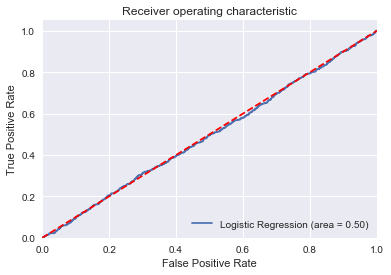

In [215]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 

# Decision Tree

In [216]:
from sklearn.model_selection import train_test_split

In [217]:
df.dtypes

Unnamed: 0                          int64
recency                             int64
frequency                           int64
monetary                          float64
r_quantile                          int64
f_quantile                          int64
m_quantile                          int64
RFMScore                            int64
InvoiceNo                          object
StockCode                          object
Quantity Shipped                  float64
Year                                int64
InvoiceDate                         int64
UnitPrice                         float64
Ext-Price                         float64
CustomerID                          int64
Country                            object
GM%                               float64
Shipper                            object
COST                              float64
EXT COST                          float64
REGION                             object
SALES P                            object
Segments_About to Sleep           

X = df[['r_quantile','f_quantile','m_quantile','Shipper','REGION','SALES P']]
y = df['Segments_Champions']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)

In [218]:
df.dtypes

Unnamed: 0                          int64
recency                             int64
frequency                           int64
monetary                          float64
r_quantile                          int64
f_quantile                          int64
m_quantile                          int64
RFMScore                            int64
InvoiceNo                          object
StockCode                          object
Quantity Shipped                  float64
Year                                int64
InvoiceDate                         int64
UnitPrice                         float64
Ext-Price                         float64
CustomerID                          int64
Country                            object
GM%                               float64
Shipper                            object
COST                              float64
EXT COST                          float64
REGION                             object
SALES P                            object
Segments_About to Sleep           

# Decision Trees

In [219]:
from sklearn.tree import DecisionTreeClassifier

In [220]:
dtree = DecisionTreeClassifier()

In [221]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Prediction and Evaluation

In [222]:
predictions = dtree.predict(X_test)

In [223]:
from sklearn.metrics import classification_report,confusion_matrix

In [224]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.87      0.88      0.88      4380
          1       0.09      0.08      0.09       633

avg / total       0.77      0.78      0.78      5013



In [225]:
print(confusion_matrix(y_test,predictions))

[[3868  512]
 [ 580   53]]


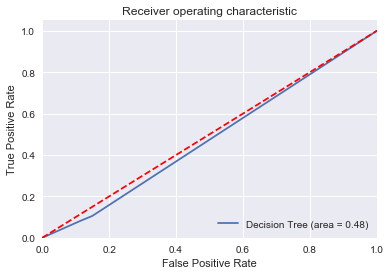

In [226]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot

dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

# Random Forest

predictions = logmodel.predict(X_test)

In [138]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

rfc_pred = rfac.predict(X_test)

In [143]:
predictions = logmodel.predict(X_test)

print(classification_report(y_test,rfc_pred))

In [145]:
from sklearn import metrics

In [149]:
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=44)

# Linear Regression

In [147]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
X=df[['recency','frequency','Ext-Price','EXT COST','Segments_About to Sleep','Segments_At Risk','Segments_Big Spender Cant lose',  
'Segments_Champions','Segments_Hibernating','Segments_Lost','Segments_Loyal Customers','Segments_Need Attention','Segments_New Customers',
'Segments_Potential Loyalist','Segments_Promising','Segments_Lost' ]]
y=df['GM%']*100
X = robust_scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1000)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_)
coeff_df
#coeff_df.to_csv('coeff_df') 

0
0	-0.332074
1	0.180412
2	4.124929
3	-3.944900
4	0.588240
5	0.256830
6	-2.124074
7	-0.641324
8	1.267181
9	0.321134
10	-0.354730
11	1.930402
12	0.326619
13	1.150568
14	-2.720845
15	0.321134

SyntaxError: invalid syntax (<ipython-input-147-2c63740512e0>, line 22)

In [148]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions) 

NameError: name 'lm' is not defined

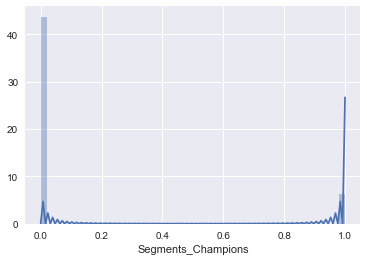

In [200]:
sns.distplot((y_test-predictions),bins=50)

In [201]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 32.149696776252796
MSE: 0.12607724225981487
RMSE: 0.35507357302369724


#Leaving Champion customers ： R：2-3，F：4，M：4
#244 Customers who haven’t purchased for a while, but who previously made frequent purchases and spent the most.
#Offer aggressive price incentives, send personalized emails to reconnect, offer renewals, and provide helpful resources.
leaving_Champion=segmented_rfm[(segmented_rfm.r_quantile>=2) & (segmented_rfm.r_quantile<=3 )&(segmented_rfm.f_quantile==4)&(segmented_rfm.m_quantile==4)]

#Left Champion customers：R：4，F：4，M：4
#444 Customers who haven’t purchased for a very long time, but who previously made frequent purchases and spent the most.
#Aggressive price incentives, attempts to win them back via renewals or newer products. Interact with these customers to keep them from going to the competition.
Left_Champion=segmented_rfm[(segmented_rfm.r_quantile==4)&(segmented_rfm.f_quantile==4)&(segmented_rfm.m_quantile==4)]

#Invaluable Shopper： R：4，F：1，M：1
#411 Customers who haven’t purchased for a very long time, purchased maybe once, and spent the least.
#Don't spend too much effort trying to get these customers to return.
Shopper=segmented_rfm[(segmented_rfm.r_quantile==4)&(segmented_rfm.f_quantile==1)&(segmented_rfm.m_quantile==1)]

Sales2.shape

#test = Sales2.iloc[:10]
#test


#Champions.append(test)

#Champions.append(test)

Champions.shape

#test.shape

#Champion_demo=pd.concat([Champions,test], axis=1, join='inner')

#Champion_demo

#Champion_demo.to_csv('Champion_demo.csv')

#Champion_demo=pd.concat([Champions,test], axis=1, join='outer')

Champion_demo=pd.concat([Champions,Sales2], axis=1, join='inner')

Champion_demo.head(20)

Champion_demo.to_csv('Champion_demo.csv')

BigSpenders.to_csv('BigSpenders.csv')

Loyal.to_csv('Loyal.csv')

leaving_Champion.to_csv('leaving_Champion.csv')

Left_Champion.to_csv('Left_Champion.csv')

Shopper.to_csv('Shopper.csv')
